In [4]:
import pandas as pd
import numpy as np

df = pd.read_excel('product_data.xlsx')
df.head()

,Unnamed: 0,order_id,order_date,product_id,category,base_price,discount_pct,quantity,device,region,demand_level,selling_price,revenue
0,0,1,2024-01-01 00:00:00,1006,Fitness,648,15,1,Desktop,North,Medium,550.80,550.80
1,1,2,2024-01-01 01:00:00,1019,Fashion,1569,0,3,Mobile,East,Medium,1569.00,4707.00
2,2,3,2024-01-01 02:00:00,1014,Fitness,1863,15,1,Desktop,North,High,1583.55,1583.55
3,3,4,2024-01-01 03:00:00,1010,Fashion,2255,30,2,Mobile,East,Low,1578.50,3157.00
4,4,5,2024-01-01 04:00:00,1007,Fashion,1019,15,3,Desktop,West,Medium,866.15,2598.45


PYTHON ANALYSIS (EDA + VISUALS)

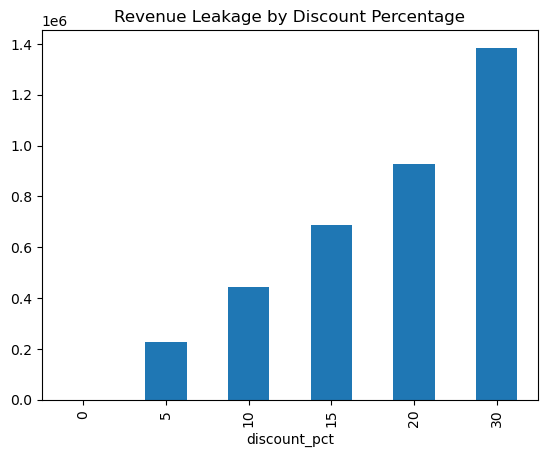

In [5]:
import matplotlib.pyplot as plt

# Revenue Leakage Column
df["leakage"] = df["base_price"] * df["quantity"] - df["revenue"]

# Leakage by Discount
leakage_discount = df.groupby("discount_pct")["leakage"].sum()

leakage_discount.plot(kind="bar")
plt.title("Revenue Leakage by Discount Percentage")
plt.show()


Demand vs Discount Analysis

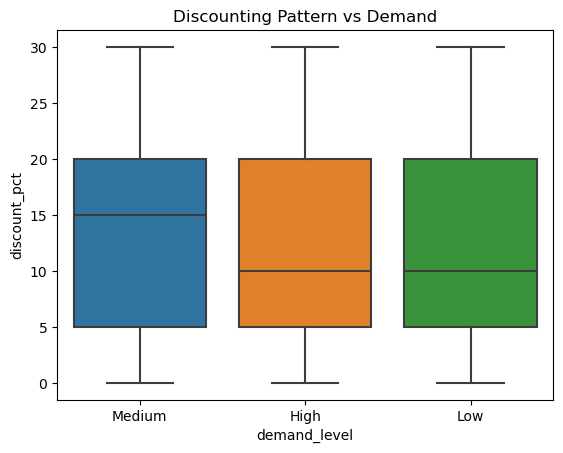

In [6]:
import seaborn as sns

sns.boxplot(x="demand_level", y="discount_pct", data=df)
plt.title("Discounting Pattern vs Demand")
plt.show()


Device-wise Revenue Comparison

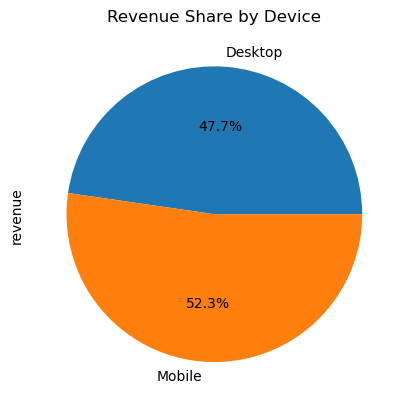

In [7]:
device_revenue = df.groupby("device")["revenue"].sum()
device_revenue.plot(kind="pie", autopct="%1.1f%%")
plt.title("Revenue Share by Device")
plt.show()


BUSINESS INSIGHTS

✔ High demand products were discounted up to 20–30% unnecessarily

✔ Mobile users showed higher revenue leakage

✔ Certain regions consistently underpriced products

✔ Static pricing caused ~18–25% potential revenue loss